In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [7]:
#Parameter specification
lambda_rate = 2.0  # Arrival rate (λ)
mu = 3.0           # Service rate (μ)
num_customers = 100  # Number of customers to simulate

In [8]:
# Data Generation
arrival_times = np.cumsum(np.random.exponential(1/lambda_rate, num_customers))
service_times = np.random.exponential(1/mu, num_customers)

start_times = np.zeros(num_customers)
end_times = np.zeros(num_customers)

for i in range(num_customers):
    start_times[i] = max(arrival_times[i], end_times[i-1] if i > 0 else 0)
    end_times[i] = start_times[i] + service_times[i]

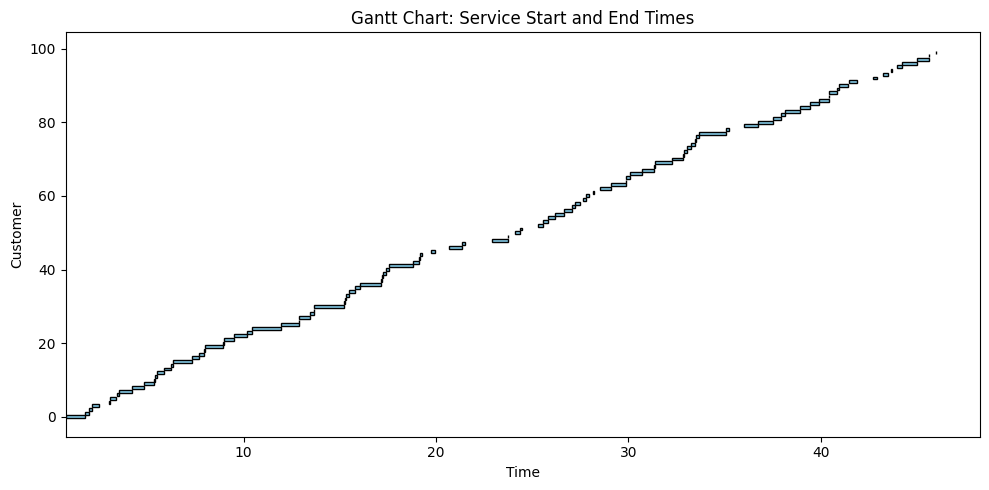

In [9]:
#Gantt Chart (Service Time)
plt.figure(figsize=(10, 5))
for i in range(num_customers):
    plt.barh(y=i, width=service_times[i], left=start_times[i], color='skyblue', edgecolor='black')
plt.xlabel('Time')
plt.ylabel('Customer')
plt.title('Gantt Chart: Service Start and End Times')
plt.tight_layout()
plt.show()

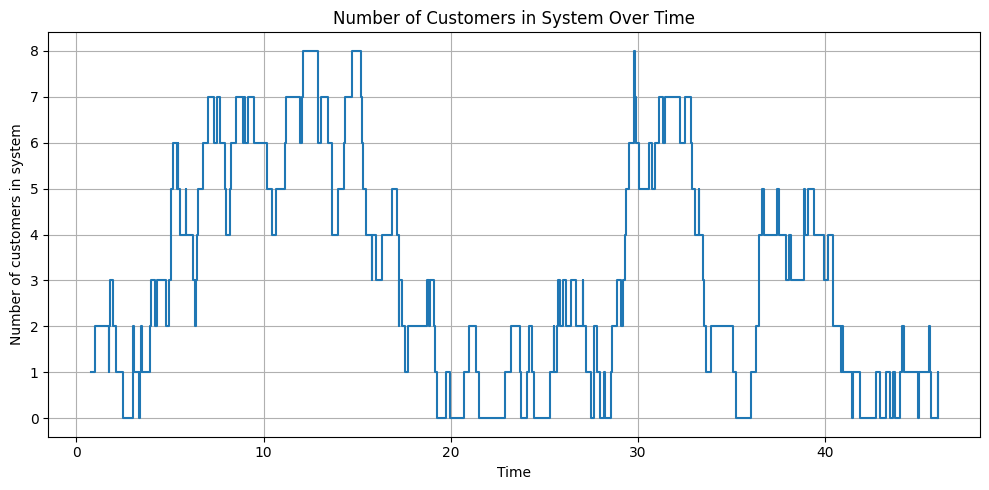

In [10]:
#Trends in the number of people in the system (line graph)
timeline = np.sort(np.concatenate((arrival_times, end_times)))
num_in_system = []

for t in timeline:
    in_system = np.sum((arrival_times <= t) & (end_times > t))
    num_in_system.append(in_system)

plt.figure(figsize=(10, 5))
plt.step(timeline, num_in_system, where='post')
plt.xlabel('Time')
plt.ylabel('Number of customers in system')
plt.title('Number of Customers in System Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


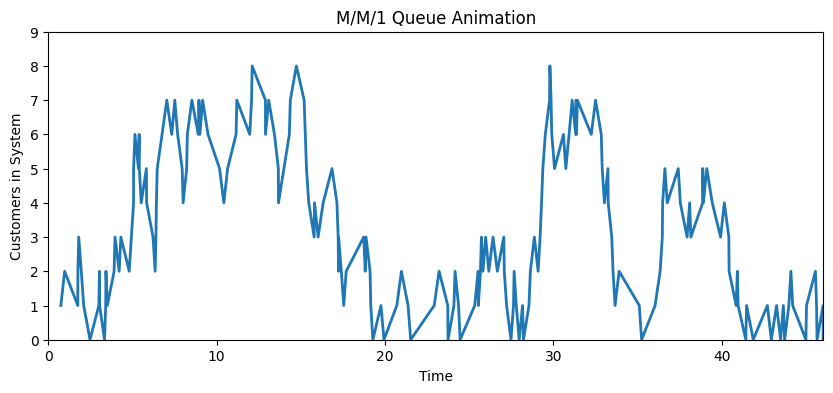

In [11]:
#Animation(The changes in the number of customers)
fig, ax = plt.subplots(figsize=(10, 4))
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, timeline[-1])
ax.set_ylim(0, max(num_in_system)+1)
ax.set_xlabel('Time')
ax.set_ylabel('Customers in System')
ax.set_title('M/M/1 Queue Animation')

x_data, y_data = [], []

def update(frame):
    x_data.append(timeline[frame])
    y_data.append(num_in_system[frame])
    line.set_data(x_data, y_data)
    return line,

ani = FuncAnimation(fig, update, frames=len(timeline), blit=True, interval=50, repeat=False)
ani.save("mm1_animation.gif", writer="pillow", fps=20)  # Save as GIF

plt.show()